In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Load the dataset
df = pd.read_csv("Data_set 2.csv")  

In [3]:
df.head()  

,gender,age,Investment_Avenues,Mutual_Funds,Equity_Market,Debentures,Government_Bonds,Fixed_Deposits,PPF,Gold,...,Duration,Invest_Monitor,Expect,Avenue,What are your savings objectives?,Reason_Equity,Reason_Mutual,Reason_Bonds,Reason_FD,Source
0,Female,34,Yes,1,2,5,3,7,6,4,...,1-3 years,Monthly,20%-30%,Mutual Fund,Retirement Plan,Capital Appreciation,Better Returns,Safe Investment,Fixed Returns,Newspapers and Magazines
1,Female,23,Yes,4,3,2,1,5,6,7,...,More than 5 years,Weekly,20%-30%,Mutual Fund,Health Care,Dividend,Better Returns,Safe Investment,High Interest Rates,Financial Consultants
2,Male,30,Yes,3,6,4,2,5,1,7,...,3-5 years,Daily,20%-30%,Equity,Retirement Plan,Capital Appreciation,Tax Benefits,Assured Returns,Fixed Returns,Television
3,Male,22,Yes,2,1,3,7,6,4,5,...,Less than 1 year,Daily,10%-20%,Equity,Retirement Plan,Dividend,Fund Diversification,Tax Incentives,High Interest Rates,Internet
4,Female,24,No,2,1,3,6,4,5,7,...,Less than 1 year,Daily,20%-30%,Equity,Retirement Plan,Capital Appreciation,Better Returns,Safe Investment,Risk Free,Internet


In [4]:
duration_summary = df['Duration'].value_counts().reset_index()
duration_summary.columns = ['Duration', 'Count']
print("Investment Duration Summary:")
print(duration_summary)

Investment Duration Summary:
            Duration  Count
0          3-5 years     19
1          1-3 years     18
2   Less than 1 year      2
3  More than 5 years      1


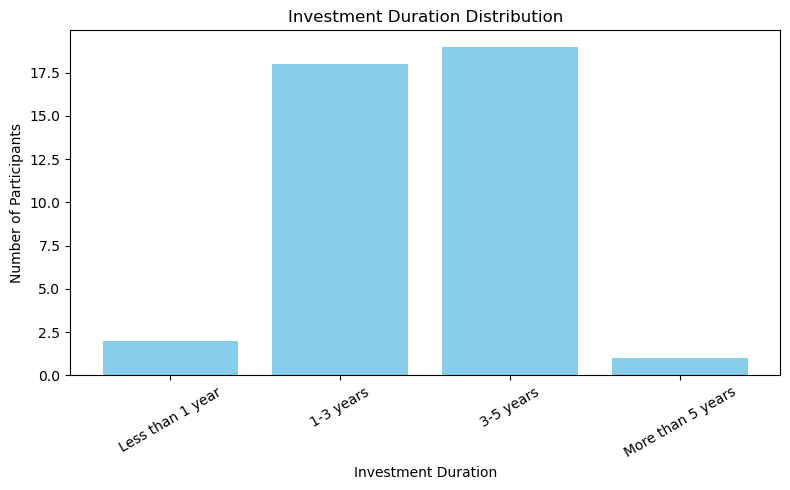

In [5]:
duration_order = ["Less than 1 year", "1-3 years", "3-5 years", "More than 5 years"]
duration_counts = df['Duration'].value_counts().reindex(duration_order)

plt.figure(figsize=(8, 5))
plt.bar(duration_counts.index, duration_counts.values, color="skyblue")
plt.xlabel("Investment Duration")
plt.ylabel("Number of Participants")
plt.title("Investment Duration Distribution")
plt.xticks(rotation=30)
plt.tight_layout()
plt.savefig("Duration_Histogram.png")
plt.show()

In [9]:
expect_summary = df['Expect'].value_counts().reset_index()
expect_summary.columns = ['Expectation', 'Count']
print("Expectation Summary:")
print(expect_summary)

Expectation Summary:
  Expectation  Count
0     20%-30%     32
1     30%-40%      5
2     10%-20%      3


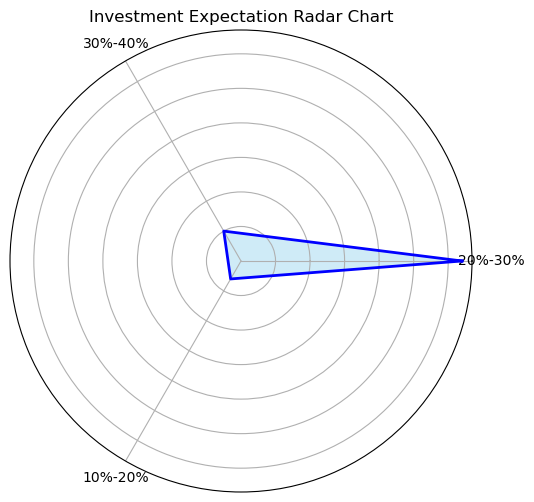

In [11]:
labels = expect_summary['Expectation'].tolist()
values = expect_summary['Count'].tolist()

# Radar chart setup
angles = np.linspace(0, 2 * np.pi, len(labels), endpoint=False).tolist()
values += values[:1]  # To complete the loop
angles += angles[:1]

fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(polar=True))
ax.plot(angles, values, color='blue', linewidth=2)
ax.fill(angles, values, color='skyblue', alpha=0.4)
ax.set_yticklabels([])
ax.set_xticks(angles[:-1])
ax.set_xticklabels(labels)
plt.title("Investment Expectation Radar Chart")
plt.savefig("Expectation_Radar_Chart.png")
plt.show()

In [20]:
with pd.ExcelWriter("Duration_Expectations_Analysis.xlsx") as writer:
    duration_summary.to_excel(writer, sheet_name='Duration Summary', index=False)
    expect_summary.to_excel(writer, sheet_name='Expectations Summary', index=False)

print("✅ Excel file saved without extra module")

✅ Excel file saved without extra module
